In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [2]:
data = pd.read_excel('data/data_ford_price.xlsx') 

# Трансформация признаков

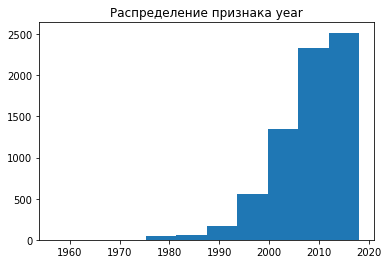

In [3]:
plt.hist(data.year)
plt.title('Распределение признака year');

## Квантильное преобразование

In [13]:
data_for_transform = data['year'].values.reshape((len(data),1))
data_for_transform

array([[2016],
       [2009],
       [2002],
       ...,
       [2006],
       [2011],
       [2010]])

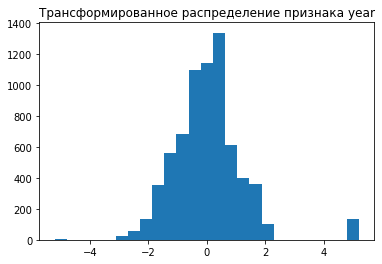

In [14]:
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

In [15]:
data_transformed

array([[ 1.55848163],
       [-0.0414126 ],
       [-0.93390994],
       ...,
       [-0.41563423],
       [ 0.27960603],
       [ 0.09927375]])

Text(0.5, 1.0, 'Condition destribution')

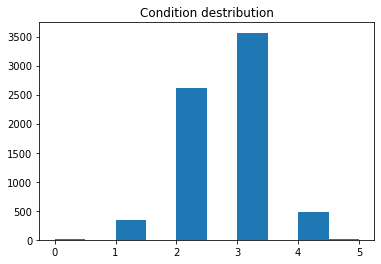

In [7]:
plt.hist(data.condition)
plt.title('Condition destribution')

In [18]:
data_for_transform = data['condition'].values.reshape((len(data), 1))

Text(0.5, 1.0, 'Transformed Condition destribution')

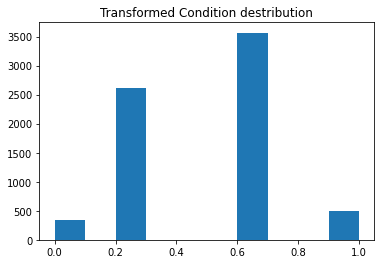

In [19]:
transformer = QuantileTransformer(output_distribution='uniform')

data_transformed = transformer.fit_transform(data_for_transform)

plt.hist(data_transformed)
plt.title('Transformed Condition destribution')

In [25]:
np.round(data_transformed[0],2)

array([0.96])

Text(0.5, 1.0, 'Cylinders destribution')

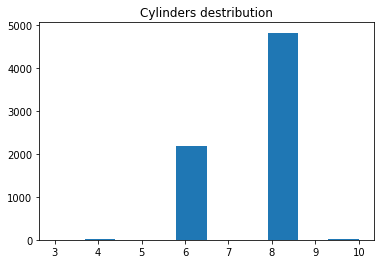

In [8]:
plt.hist(data.cylinders)
plt.title('Cylinders destribution')

Text(0.5, 1.0, 'Transformed Cylinders distribution')

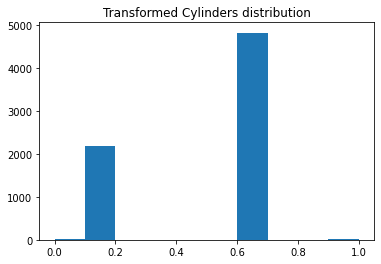

In [17]:
data_for_transform = data['cylinders'].values.reshape((len(data), 1))
transformer = QuantileTransformer(output_distribution='uniform')
data_transformed = transformer.fit_transform(data_for_transform)
plt.hist(data_transformed)
plt.title('Transformed Cylinders distribution')

## Логарифмическое преобразование

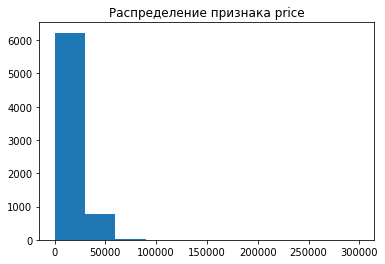

In [26]:
plt.hist(data.price)
plt.title('Распределение признака price');

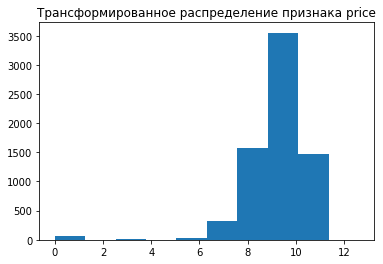

In [28]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [29]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


In [31]:
print(log_price.tail(1))

7016    9.798127
Name: price, dtype: float64


## Преобразование Бокса-Кокса

In [34]:
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


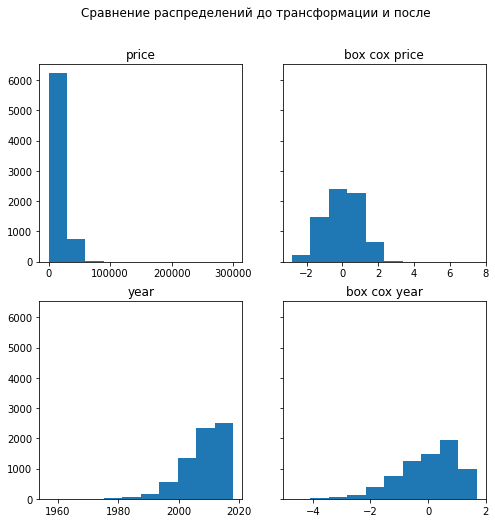

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()